In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn import datasets


In [19]:
data = datasets.load_diabetes()
x = data.data
y = data.target

In [8]:
df = pd.DataFrame(x,columns=data.feature_names)
df['target'] = data.target
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [9]:
df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [10]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [14]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)
x

array([[ 0.80050009,  1.06548848,  1.29708846, ..., -0.05449919,
         0.41853093, -0.37098854],
       [-0.03956713, -0.93853666, -1.08218016, ..., -0.83030083,
        -1.43658851, -1.93847913],
       [ 1.79330681,  1.06548848,  0.93453324, ..., -0.05449919,
         0.06015558, -0.54515416],
       ...,
       [ 0.87686984,  1.06548848, -0.33441002, ..., -0.23293356,
        -0.98564884,  0.32567395],
       [-0.9560041 , -0.93853666,  0.82123474, ...,  0.55838411,
         0.93616291, -0.54515416],
       [-0.9560041 , -0.93853666, -1.53537419, ..., -0.83030083,
        -0.08875225,  0.06442552]], shape=(442, 10))

In [15]:
#using kmeans with range value
wss=[]
for i in range(1,11):
    model = KMeans(n_clusters=i,init='k-means++',random_state=0)
    model.fit(x)
    wss.append(model.inertia_)

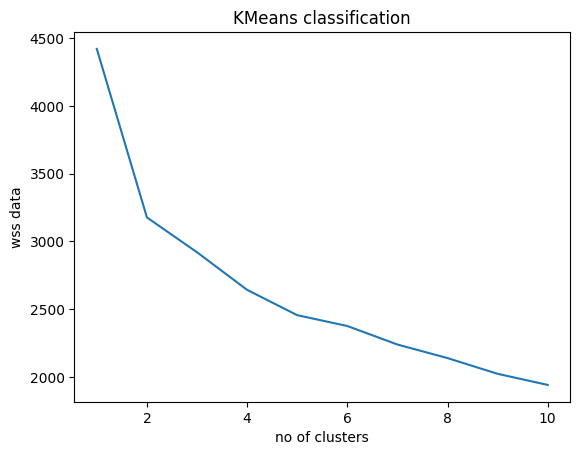

In [16]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),wss)
plt.title("KMeans classification")
plt.xlabel("no of clusters")
plt.ylabel("wss data")
plt.show()

In [17]:
model = KMeans(n_clusters=3,init='k-means++',random_state=0)
model.fit(x)
labels = model.labels_
labels

array([1, 0, 1, 1, 2, 0, 0, 1, 1, 0, 0, 1, 2, 1, 2, 1, 2, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 2, 2, 0, 1, 1, 1, 0, 0, 2,
       1, 2, 0, 0, 2, 1, 0, 1, 2, 2, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 2, 1, 2, 1, 2, 1, 0, 0, 0, 0, 2, 1, 2, 0, 0, 2, 0, 2,
       0, 2, 0, 1, 2, 0, 0, 0, 1, 1, 0, 2, 2, 2, 2, 1, 0, 0, 0, 1, 1, 1,
       0, 2, 0, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 0, 1, 0, 2, 0, 1, 1, 0,
       1, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 2,
       1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 2, 2, 1, 0, 2, 1, 0, 1, 2, 1,
       0, 2, 2, 0, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1,
       0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 2, 2, 2, 1, 0,
       0, 1, 0, 2, 1, 2, 1, 1, 0, 1, 2, 1, 2, 0, 1, 0, 1, 0, 2, 0, 0, 1,
       0, 2, 2, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 1,

In [18]:
acc = accuracy_score(labels,y)
acc

0.0

In [20]:
from sklearn.metrics import adjusted_rand_score
accs = adjusted_rand_score(labels,y)
accs

0.0015031309002777726